## Latar Belakang
Transjakarta, sistem Bus Rapid Transit (BRT) utama di Jakarta, melayani populasi kota yang padat dengan lalu lintas yang terkenal macet. Meskipun bertujuan mengurangi kemacetan dan meningkatkan aksesibilitas transportasi, salah satu tantangan utamanya adalah menangani kepadatan penumpang, terutama selama jam sibuk. Kepadatan yang berlebihan bisa menurunkan kualitas perjalanan, meningkatkan waktu tempuh, dan mengurangi kepuasan penumpang, yang pada akhirnya berdampak pada penggunaan layanan.


## Pernyataan Masalah
Dalam konteks urban yang semakin berkembang, Transjakarta dihadapkan pada kebutuhan untuk mengelola kepadatan penumpang yang semakin meningkat. Pertanyaan penelitian yang penting termasuk:

- Bagaimana pola kepadatan penumpang berubah sepanjang hari atau antar rute?
- Apakah ada koridor atau jenis layanan (mis. reguler vs non-reguler) yang secara konsisten mengalami kepadatan tinggi?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Membaca data dari file CSV
file_path = 'data_relevan.csv'
df_raw = pd.read_csv(file_path)

## Keterangan dataset

- transID: ID transaksi unik untuk setiap transaksi.
- payCardID: Identifikasi utama pelanggan. Kartu yang digunakan pelanggan sebagai tiket masuk dan keluar.
- payCardBank: Nama penerbit bank kartu pelanggan.
- payCardName: Nama pelanggan yang terdapat dalam kartu.
- payCardSex: Jenis kelamin pelanggan yang terdapat dalam kartu.
- payCardBirthDate: Tahun kelahiran pelanggan.
- corridorID: ID Koridor/Rute sebagai kunci untuk pengelompokan rute.
- corridorName: Nama Koridor/Rute yang berisi Titik Awal dan Titik Akhir untuk setiap rute.
- direction: 0 untuk Pergi, 1 untuk Kembali. Arah rute.
- tapInStops: ID Titik Masuk (pintu masuk) untuk mengidentifikasi nama-nama halte.
- tapInStopsName: Nama Titik Masuk (pintu masuk) tempat pelanggan mengetuk kartu.
- tapInStopsLat: Garis lintang Titik Masuk (pintu masuk).
- tapInStopsLon: Garis bujur Titik Masuk (pintu masuk).
- stopStartSeq: Urutan dari halte-halte, halte pertama, halte kedua, dan seterusnya. Terkait dengan arah.
- tapInTime: Waktu ketika pelanggan mengetuk kartu masuk. Tanggal dan waktu.
- tapOutStops: ID Titik Keluar (pintu keluar) untuk mengidentifikasi nama-nama halte.
- tapOutStopsName: Nama Titik Keluar (pintu keluar) tempat pelanggan mengetuk kartu.
- tapOutStopsLat: Garis lintang Titik Keluar (pintu keluar).
- tapOutStopsLon: Garis bujur Titik Keluar (pintu keluar).
- stopEndSeq: Urutan dari halte-halte, halte pertama, halte kedua, dan seterusnya. Terkait dengan arah.
- tapOutTime: Waktu ketika pelanggan mengetuk kartu keluar. Tanggal dan waktu.
- payAmount: Jumlah yang dibayarkan oleh pelanggan. Beberapa gratis, beberapa tidak.

In [2]:
df_raw=pd.read_csv('Transjakarta.csv')
display(df_raw.head(),df_raw.tail())

# Berikut 5 baris teratas dan terbawah dari dataset Transjakarta.

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


## DATA CLEANING

In [3]:
import pandas as pd

# Mengganti dengan path lengkap ke file 'Transjakarta.csv' di sistem lokal Anda
path_file_csv_lokal = 'Transjakarta.csv'

# Membaca file CSV
df_raw = pd.read_csv(path_file_csv_lokal)

# Kolom yang relevan untuk analisis kepadatan penumpang
kolom_relevan = ['tapInTime', 'tapOutTime', 'tapInStops', 'tapOutStops', 'corridorID', 'corridorName', 'direction']

# Menyaring data hanya dengan kolom yang relevan
data_relevan = df_raw[kolom_relevan]

# Menyimpan data yang telah disaring ke file CSV baru
# Gantikan 'data_relevan.csv' dengan nama file yang Anda inginkan
data_relevan.to_csv('data_relevan.csv', index=False)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Membaca data dari file CSV
file_path = 'data_relevan.csv'
df = pd.read_csv(file_path)
df

,tapInTime,tapOutTime,tapInStops,tapOutStops,corridorID,corridorName,direction
0,2023-04-03 05:21:44,2023-04-03 06:00:53,P00142,P00253,5,Matraman Baru - Ancol,1.0
1,2023-04-03 05:42:44,2023-04-03 06:40:01,B01963P,B03307P,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0
2,2023-04-03 05:59:06,2023-04-03 06:50:55,B00499P,B04962P,R1A,Pantai Maju - Kota,0.0
3,2023-04-03 05:44:51,2023-04-03 06:28:16,B05587P,B03090P,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0
4,2023-04-03 06:17:35,2023-04-03 06:57:03,P00239,P00098,12,Tanjung Priok - Pluit,0.0
...,...,...,...,...,...,...,...
37895,2023-04-21 18:18:37,2023-04-21 19:55:49,P00261,P00228,6B,Ragunan - MH Thamrin via Semanggi,1.0
37896,2023-04-18 21:52:31,2023-04-18 22:28:22,P00064,P00179,9N,Pinang Ranti - Pramuka,1.0
37897,2023-04-04 10:29:47,2023-04-04 13:27:25,B02873P,B00226P,1T,Cibubur - Balai Kota,1.0
37898,2023-04-15 19:59:26,2023-04-15 20:27:50,B02505P,B01787P,JAK.13,Tanah Abang - Jembatan Lima,1.0


In [5]:
# Menghitung jumlah dan persentase missing values untuk setiap kolom
missing_data_count = df.isnull().sum()
total_rows = len(df)

# Menghitung persentase
missing_data_percentage = (missing_data_count / total_rows) * 100

# Membuat DataFrame untuk menampilkan hasil
missing_data_df = pd.DataFrame({
    'Kolom': missing_data_count.index,
    'Jumlah Missing Values': missing_data_count.values,
    'Persentase Missing Values (%)': missing_data_percentage.values
})

missing_data_df.sort_values(by='Persentase Missing Values (%)', ascending=False)

,Kolom,Jumlah Missing Values,Persentase Missing Values (%)
3,tapOutStops,2289,6.039578
5,corridorName,1930,5.092348
1,tapOutTime,1344,3.546174
4,corridorID,1257,3.316623
2,tapInStops,1213,3.200528
0,tapInTime,0,0.000000
6,direction,0,0.000000


In [6]:
# Membuat pemetaan untuk setiap jenis layanan
jenis_layanan = {
    "Reguler BRT": ["1", "2", "2A", "3", "3F", "3H", "4", "4D", "5", "5C", "5D", "6", "6A", "6B", "6V", "7", "7F", "8", "9", "9A", "9C", "9N", "10", "10D", "10H", "11", "12", "13", "13C", "13D", "L13E", "M1", "M10", "M11", "M12", "M13", "M2", "M3", "M4", "M5", "M6", "M7", "M8", "M9"],
    "Non reguler BRT": ["1A", "1B", "1C", "1E", "1F", "1H", "1M", "1N", "1P", "1Q", "1R", "2B", "2P", "2Q", "3E", "4B", "4C", "4F", "5B", "5F", "5M", "5N", "6C", "6D", "6H", "6K", "6M", "6N", "6Q", "6T", "6U", "7A", "7B", "7D", "7E", "7P", "7Q", "7R", "7T", "7U", "7V", "7W", "8C", "8D", "8E", "8K", "8M", "9D", "9E", "9H", "10K", "11D", "11Q", "12A", "12B", "12P", "14", "JIS3", "R1A"],
    "Royal transjakarta": ["1K", "1T", "1U", "6P", "B13", "B14", "D31", "D32", "S12", "S13", "S14", "S31"],
    "Mikrotrans": ["JAK01", "JAK02", "JAK03", "JAK04", "JAK05", "JAK06", "JAK07", "JAK08", "JAK09", "JAK10", "JAK100", "JAK102", "JAK105", "JAK106", "JAK108", "JAK10A", "JAK10B", "JAK11", "JAK110A", "JAK110B", "JAK112", "JAK113", "JAK115", "JAK117", "JAK118", "JAK12", "JAK120", "JAK13", "JAK14", "JAK15", "JAK16", "JAK17", "JAK18", "JAK19", "JAK20", "JAK21", "JAK22", "JAK23", "JAK24", "JAK25", "JAK26", "JAK27", "JAK28", "JAK29", "JAK30", "JAK31", "JAK32", "JAK33", "JAK34", "JAK35", "JAK36", "JAK37", "JAK38", "JAK39", "JAK40", "JAK41", "JAK42", "JAK43B", "JAK43C", "JAK44", "JAK45", "JAK46", "JAK47", "JAK48A", "JAK48B", "JAK49", "JAK50", "JAK51", "JAK52", "JAK53", "JAK54", "JAK56", "JAK58", "JAK59", "JAK60", "JAK61", "JAK64", "JAK71", "JAK72", "JAK73", "JAK74", "JAK75", "JAK76", "JAK77", "JAK80", "JAK84", "JAK85", "JAK86", "JAK87", "JAK88", "JAK89", "JAK90", "JAK93", "JAK95", "JAK98", "JAK99"],
    "Transjabodetabek": ["7C", "B11", "B21", "D11", "D21", "S11", "S21", "S22", "T11", "T12"]
}

# Fungsi untuk mendapatkan jenis layanan berdasarkan corridorID

In [7]:
# Fungsi untuk mendapatkan jenis layanan berdasarkan corridorID
def get_jenis_layanan(corridor_id):
    for jenis, ids in jenis_layanan.items():
        if corridor_id in ids:
            return jenis
    # Jika corridorID tidak ditemukan di dalam pemetaan, kita bisa mengembalikan None atau kategori khusus
    return "Tidak Diketahui"

# Menerapkan fungsi ke DataFrame untuk membuat kolom baru
df['jenis_kendaraan'] = df['corridorID'].apply(get_jenis_layanan)

# Memeriksa hasilnya dari data yang sudah diperbarui
df

,tapInTime,tapOutTime,tapInStops,tapOutStops,corridorID,corridorName,direction,jenis_kendaraan
0,2023-04-03 05:21:44,2023-04-03 06:00:53,P00142,P00253,5,Matraman Baru - Ancol,1.0,Reguler BRT
1,2023-04-03 05:42:44,2023-04-03 06:40:01,B01963P,B03307P,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,Non reguler BRT
2,2023-04-03 05:59:06,2023-04-03 06:50:55,B00499P,B04962P,R1A,Pantai Maju - Kota,0.0,Non reguler BRT
3,2023-04-03 05:44:51,2023-04-03 06:28:16,B05587P,B03090P,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,Non reguler BRT
4,2023-04-03 06:17:35,2023-04-03 06:57:03,P00239,P00098,12,Tanjung Priok - Pluit,0.0,Reguler BRT
...,...,...,...,...,...,...,...,...
37895,2023-04-21 18:18:37,2023-04-21 19:55:49,P00261,P00228,6B,Ragunan - MH Thamrin via Semanggi,1.0,Reguler BRT
37896,2023-04-18 21:52:31,2023-04-18 22:28:22,P00064,P00179,9N,Pinang Ranti - Pramuka,1.0,Reguler BRT
37897,2023-04-04 10:29:47,2023-04-04 13:27:25,B02873P,B00226P,1T,Cibubur - Balai Kota,1.0,Royal transjakarta
37898,2023-04-15 19:59:26,2023-04-15 20:27:50,B02505P,B01787P,JAK.13,Tanah Abang - Jembatan Lima,1.0,Tidak Diketahui


In [8]:
# Menghapus titik dari 'corridorID' dan mengupdate nilai dalam kolom
df['corridorID'] = df['corridorID'].str.replace('.', '', regex=False)

# Setelah memperbarui 'corridorID', kita perlu memperbarui 'jenis_kendaraan' dengan pemetaan yang benar
df['jenis_kendaraan'] = df['corridorID'].apply(get_jenis_layanan)

# Verifikasi hasil perubahan dengan menampilkan data yang diperbarui
df

,tapInTime,tapOutTime,tapInStops,tapOutStops,corridorID,corridorName,direction,jenis_kendaraan
0,2023-04-03 05:21:44,2023-04-03 06:00:53,P00142,P00253,5,Matraman Baru - Ancol,1.0,Reguler BRT
1,2023-04-03 05:42:44,2023-04-03 06:40:01,B01963P,B03307P,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,Non reguler BRT
2,2023-04-03 05:59:06,2023-04-03 06:50:55,B00499P,B04962P,R1A,Pantai Maju - Kota,0.0,Non reguler BRT
3,2023-04-03 05:44:51,2023-04-03 06:28:16,B05587P,B03090P,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,Non reguler BRT
4,2023-04-03 06:17:35,2023-04-03 06:57:03,P00239,P00098,12,Tanjung Priok - Pluit,0.0,Reguler BRT
...,...,...,...,...,...,...,...,...
37895,2023-04-21 18:18:37,2023-04-21 19:55:49,P00261,P00228,6B,Ragunan - MH Thamrin via Semanggi,1.0,Reguler BRT
37896,2023-04-18 21:52:31,2023-04-18 22:28:22,P00064,P00179,9N,Pinang Ranti - Pramuka,1.0,Reguler BRT
37897,2023-04-04 10:29:47,2023-04-04 13:27:25,B02873P,B00226P,1T,Cibubur - Balai Kota,1.0,Royal transjakarta
37898,2023-04-15 19:59:26,2023-04-15 20:27:50,B02505P,B01787P,JAK13,Tanah Abang - Jembatan Lima,1.0,Mikrotrans


In [9]:
# Mengonversi kolom 'tapInTime' dan 'tapOutTime' ke dalam format datetime
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

# Menghitung durasi perjalanan dalam menit
df['durasi_perjalanan'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60

# Menampilkan data yang sudah diperbarui untuk memastikan kolom 'durasi_perjalanan' ditambahkan dengan benar
df


,tapInTime,tapOutTime,tapInStops,tapOutStops,corridorID,corridorName,direction,jenis_kendaraan,durasi_perjalanan
0,2023-04-03 05:21:44,2023-04-03 06:00:53,P00142,P00253,5,Matraman Baru - Ancol,1.0,Reguler BRT,39.150000
1,2023-04-03 05:42:44,2023-04-03 06:40:01,B01963P,B03307P,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,Non reguler BRT,57.283333
2,2023-04-03 05:59:06,2023-04-03 06:50:55,B00499P,B04962P,R1A,Pantai Maju - Kota,0.0,Non reguler BRT,51.816667
3,2023-04-03 05:44:51,2023-04-03 06:28:16,B05587P,B03090P,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,Non reguler BRT,43.416667
4,2023-04-03 06:17:35,2023-04-03 06:57:03,P00239,P00098,12,Tanjung Priok - Pluit,0.0,Reguler BRT,39.466667
...,...,...,...,...,...,...,...,...,...
37895,2023-04-21 18:18:37,2023-04-21 19:55:49,P00261,P00228,6B,Ragunan - MH Thamrin via Semanggi,1.0,Reguler BRT,97.200000
37896,2023-04-18 21:52:31,2023-04-18 22:28:22,P00064,P00179,9N,Pinang Ranti - Pramuka,1.0,Reguler BRT,35.850000
37897,2023-04-04 10:29:47,2023-04-04 13:27:25,B02873P,B00226P,1T,Cibubur - Balai Kota,1.0,Royal transjakarta,177.633333
37898,2023-04-15 19:59:26,2023-04-15 20:27:50,B02505P,B01787P,JAK13,Tanah Abang - Jembatan Lima,1.0,Mikrotrans,28.400000


In [10]:
# Memeriksa tipe data dari setiap kolom
tipe_data = df.dtypes

tipe_data

tapInTime            datetime64[ns]
tapOutTime           datetime64[ns]
tapInStops                   object
tapOutStops                  object
corridorID                   object
corridorName                 object
direction                   float64
jenis_kendaraan              object
durasi_perjalanan           float64
dtype: object

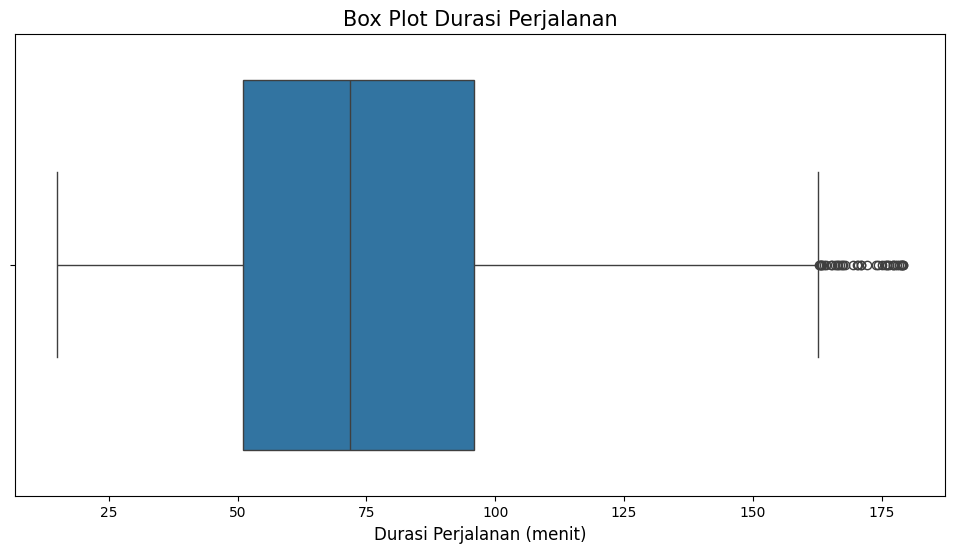

In [11]:
# Mengidentifikasi pencilan menggunakan box plot untuk 'durasi_perjalanan'
plt.figure(figsize=(12, 6))

# Membuat box plot
sns.boxplot(x=df['durasi_perjalanan'])

plt.title('Box Plot Durasi Perjalanan', fontsize=15)
plt.xlabel('Durasi Perjalanan (menit)', fontsize=12)

# Menampilkan plot
plt.show()

In [12]:
# Menghitung median dari 'durasi_perjalanan'
median_durasi = df['durasi_perjalanan'].median()

# Melakukan imputasi nilai yang hilang di kolom 'durasi_perjalanan' dengan median
df['durasi_perjalanan'].fillna(median_durasi, inplace=True)

# Memeriksa apakah imputasi berhasil
df['durasi_perjalanan'].isnull().sum()


0

In [13]:
# Mengelompokkan data berdasarkan 'corridorID' dan menghitung modus 'corridorName' untuk setiap grup.
corridor_mode = df.groupby('corridorID')['corridorName'].agg(pd.Series.mode)

# Mengonversi hasil ke DataFrame untuk memudahkan manipulasi data
corridor_mode_df = corridor_mode.reset_index()

# Membuat fungsi untuk mengisi nilai yang hilang
def fill_missing_values(row):
    if pd.isnull(row['corridorName']) and row['corridorID'] in corridor_mode_df['corridorID'].values:
        return corridor_mode_df.loc[corridor_mode_df['corridorID'] == row['corridorID'], 'corridorName'].values[0]
    else:
        return row['corridorName']

# Mengisi nilai yang hilang di 'corridorName' dengan modus berdasarkan 'corridorID'
df['corridorName'] = df.apply(fill_missing_values, axis=1)

# Memeriksa apakah ada nilai yang hilang yang tersisa di 'corridorName'
remaining_missing = df['corridorName'].isnull().sum()
remaining_missing


1125

In [14]:
# Menghitung persentase nilai yang masih hilang di kolom 'corridorName'
total_rows = df.shape[0]
percentage_missing_corridorName = (remaining_missing / total_rows) * 100
percentage_missing_corridorName

2.9683377308707124

In [15]:
# Mengelompokkan data berdasarkan 'tapInStops' dan menghitung modus 'tapOutStops' untuk setiap grup.
tapout_mode_per_tapin = df.groupby('tapInStops')['tapOutStops'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Mengonversi hasil ke DataFrame untuk memudahkan manipulasi data
tapout_mode_per_tapin_df = tapout_mode_per_tapin.reset_index()

# Menampilkan beberapa baris pertama dari dataframe untuk verifikasi
tapout_mode_per_tapin_df.head()


,tapInStops,tapOutStops
0,B00001P,B00536P
1,B00004P,B05612P
2,B00005P,B05703P
3,B00008P,B05760P
4,B00017P,B04791P


In [16]:
# Fungsi untuk mengisi nilai yang hilang di 'tapOutStops' berdasarkan modus dari 'tapInStops' mereka.
def fill_missing_tapout(row):
    if pd.isnull(row['tapOutStops']) and row['tapInStops'] in tapout_mode_per_tapin_df['tapInStops'].values:
        mode_value = tapout_mode_per_tapin_df.loc[tapout_mode_per_tapin_df['tapInStops'] == row['tapInStops'], 'tapOutStops'].values
        if mode_value.size > 0:
            return mode_value[0]
    return row['tapOutStops']

# Mengisi nilai yang hilang di 'tapOutStops'
df['tapOutStops'] = df.apply(fill_missing_tapout, axis=1)

# Memeriksa apakah ada nilai yang hilang yang tersisa di 'tapOutStops'
remaining_missing_tapout = df['tapOutStops'].isnull().sum()
remaining_missing_tapout

125

In [17]:
# Menghapus semua baris yang memiliki setidaknya satu nilai yang hilang
df_clean_complete = df.dropna()

# Memeriksa jumlah baris yang tersisa setelah penghapusan untuk memastikan operasi berjalan dengan baik
total_rows_after_dropping = df_clean_complete.shape[0]

# Menghitung dan menampilkan persentase data yang dipertahankan setelah penghapusan
percentage_retained = (total_rows_after_dropping / df.shape[0]) * 100
total_rows_after_dropping, percentage_retained

(34184, 90.19525065963062)

In [18]:
# Menghitung persentase nilai yang hilang untuk setiap kolom dalam DataFrame
percentage_missing_all = df.isnull().sum() / total_rows * 100
percentage_missing_all = percentage_missing_all.reset_index()
percentage_missing_all.columns = ['Kolom', 'Persentase Missing Values (%)']
percentage_missing_all

,Kolom,Persentase Missing Values (%)
0,tapInTime,0.000000
1,tapOutTime,3.546174
2,tapInStops,3.200528
3,tapOutStops,0.329815
4,corridorID,3.316623
5,corridorName,2.968338
6,direction,0.000000
7,jenis_kendaraan,0.000000
8,durasi_perjalanan,0.000000


In [19]:
# Menghitung modus untuk 'tapInStops' dan 'tapOutStops'
modus_tapInStops = df['tapInStops'].mode()[0]
modus_tapOutStops = df['tapOutStops'].mode()[0]

# Untuk 'tapOutTime', kita akan menggunakan metode 'forward fill'
df['tapOutTime'].fillna(method='ffill', inplace=True)

# Memeriksa apakah semua imputasi berhasil
df.isnull().sum()


tapInTime               0
tapOutTime              0
tapInStops           1213
tapOutStops           125
corridorID           1257
corridorName         1125
direction               0
jenis_kendaraan         0
durasi_perjalanan       0
dtype: int64

In [20]:
# Menghapus baris yang memiliki nilai yang hilang di kolom 'tapOutTime', 'tapInStops', 'tapOutStops', 'corridorID', atau 'corridorName'
df = df.dropna(subset=['tapOutTime', 'tapInStops', 'tapOutStops', 'corridorID', 'corridorName'])

# Untuk verifikasi, Anda dapat menampilkan jumlah baris yang tersisa setelah penghapusan
print("Jumlah baris setelah menghapus nilai yang hilang:", len(df))

Jumlah baris setelah menghapus nilai yang hilang: 35407


In [21]:
# Menghitung persentase nilai yang hilang untuk setiap kolom dalam DataFrame
percentage_missing_all = df.isnull().sum() / total_rows * 100
percentage_missing_all = percentage_missing_all.reset_index()
percentage_missing_all.columns = ['Kolom', 'Persentase Missing Values (%)']
percentage_missing_all

,Kolom,Persentase Missing Values (%)
0,tapInTime,0.0
1,tapOutTime,0.0
2,tapInStops,0.0
3,tapOutStops,0.0
4,corridorID,0.0
5,corridorName,0.0
6,direction,0.0
7,jenis_kendaraan,0.0
8,durasi_perjalanan,0.0


In [22]:
# Memperbarui kolom 'durasi_perjalanan' dengan membulatkan nilai ke bilangan bulat terdekat,
# sambil mengabaikan nilai non-finite (NaN atau tak terhingga)
df['durasi_perjalanan'] = df['durasi_perjalanan'].round().dropna().astype(int)

# Menampilkan beberapa baris pertama dari data yang sudah diperbarui untuk memastikan perubahan telah dilakukan dengan benar
df

,tapInTime,tapOutTime,tapInStops,tapOutStops,corridorID,corridorName,direction,jenis_kendaraan,durasi_perjalanan
0,2023-04-03 05:21:44,2023-04-03 06:00:53,P00142,P00253,5,Matraman Baru - Ancol,1.0,Reguler BRT,39
1,2023-04-03 05:42:44,2023-04-03 06:40:01,B01963P,B03307P,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,Non reguler BRT,57
2,2023-04-03 05:59:06,2023-04-03 06:50:55,B00499P,B04962P,R1A,Pantai Maju - Kota,0.0,Non reguler BRT,52
3,2023-04-03 05:44:51,2023-04-03 06:28:16,B05587P,B03090P,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,Non reguler BRT,43
4,2023-04-03 06:17:35,2023-04-03 06:57:03,P00239,P00098,12,Tanjung Priok - Pluit,0.0,Reguler BRT,39
...,...,...,...,...,...,...,...,...,...
37895,2023-04-21 18:18:37,2023-04-21 19:55:49,P00261,P00228,6B,Ragunan - MH Thamrin via Semanggi,1.0,Reguler BRT,97
37896,2023-04-18 21:52:31,2023-04-18 22:28:22,P00064,P00179,9N,Pinang Ranti - Pramuka,1.0,Reguler BRT,36
37897,2023-04-04 10:29:47,2023-04-04 13:27:25,B02873P,B00226P,1T,Cibubur - Balai Kota,1.0,Royal transjakarta,178
37898,2023-04-15 19:59:26,2023-04-15 20:27:50,B02505P,B01787P,JAK13,Tanah Abang - Jembatan Lima,1.0,Mikrotrans,28


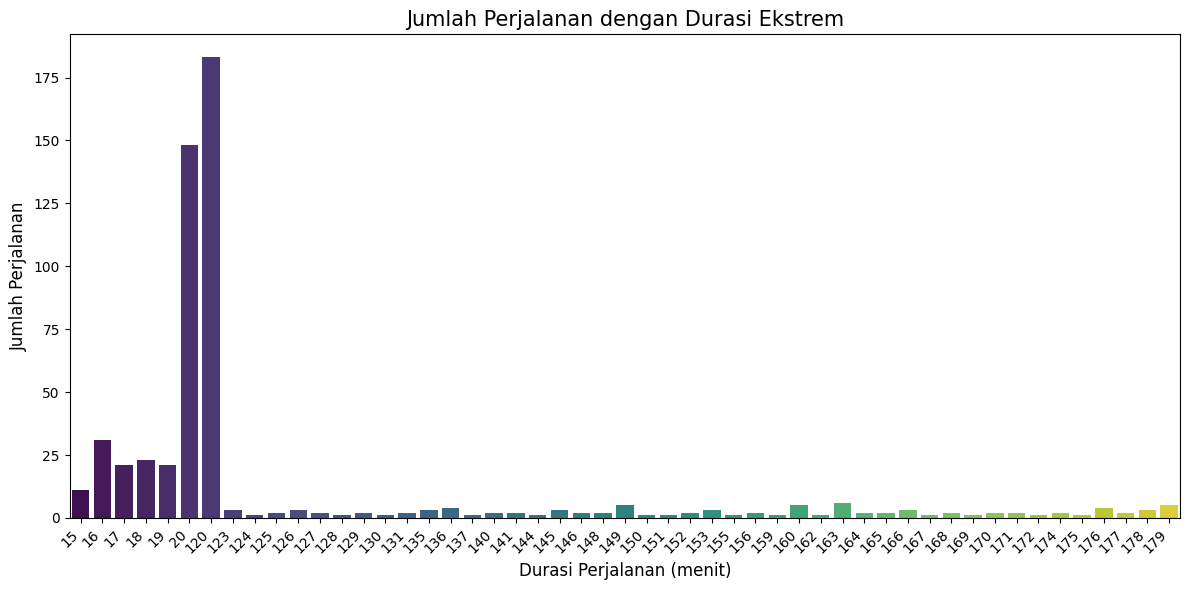

In [23]:
# Asumsikan 'df' adalah DataFrame Anda
# df = pd.read_csv('file_anda.csv')  # Misalkan Anda memuat data dari file CSV

# Menghitung persentil untuk menentukan apa yang dianggap ekstrem
bawah, atas = df['durasi_perjalanan'].quantile([0.01, 0.99]).values  # 1% dan 99% untuk menangkap pencilan

# Menyaring data untuk hanya mencakup perjalanan dengan durasi di luar batas normal
data_ekstrem = df[(df['durasi_perjalanan'] < bawah) | (df['durasi_perjalanan'] > atas)]

# Menghitung jumlah perjalanan ekstrem
# Disini kita ubah durasi perjalanan ke bilangan bulat sebelum menghitung nilai
data_ekstrem['durasi_perjalanan'] = data_ekstrem['durasi_perjalanan'].astype(int)
jumlah_perjalanan_ekstrem = data_ekstrem['durasi_perjalanan'].value_counts()

# Membuat barchart untuk nilai yang tidak wajar
plt.figure(figsize=(12, 6))
sns.barplot(x=jumlah_perjalanan_ekstrem.index, y=jumlah_perjalanan_ekstrem.values, palette='viridis')

plt.title('Jumlah Perjalanan dengan Durasi Ekstrem', fontsize=15)
plt.xlabel('Durasi Perjalanan (menit)', fontsize=12)
plt.ylabel('Jumlah Perjalanan', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotasi label x agar mudah dibaca
plt.tight_layout()

# Menampilkan grafik
plt.show()

In [24]:
# Langkah 1: Konfirmasi tidak ada nilai yang hilang di "durasi_perjalanan"
tidak_ada_missing_values = df['durasi_perjalanan'].isnull().sum() == 0

# Langkah 2: Pemeriksaan pencilan dengan deskripsi statistik
deskripsi_durasi = df['durasi_perjalanan'].describe()

tidak_ada_missing_values, deskripsi_durasi

(True,
 count    35407.000000
 mean        72.190527
 std         27.596783
 min         15.000000
 25%         52.000000
 50%         72.000000
 75%         95.000000
 max        179.000000
 Name: durasi_perjalanan, dtype: float64)

In [25]:
# Mengonversi "durasi_perjalanan" ke integer terdekat (dalam menit)
df['durasi_perjalanan'] = df['durasi_perjalanan'].astype(int)

# Memeriksa tipe data dari kolom dan beberapa entri teratas untuk memastikan konversi berhasil
tipe_data_durasi = df['durasi_perjalanan'].dtype
data_teratas_durasi = df.head()

tipe_data_durasi, data_teratas_durasi[['durasi_perjalanan']]

(dtype('int32'),
    durasi_perjalanan
 0                 39
 1                 57
 2                 52
 3                 43
 4                 39)

In [26]:
# Menentukan path di mana file CSV yang sudah dibersihkan akan disimpan
path_bersih = "data_relevan_bersih.csv"

# Menyimpan dataframe ke file CSV
df.to_csv(path_bersih, index=False)  # index=False mencegah penulisan kolom indeks ke file

# Memberikan path file yang sudah disimpan ke pengguna
path_bersih

'data_relevan_bersih.csv'

## DATA ANALISIS

In [27]:
import pandas as pd

# Memuat data dari file CSV
file_path = 'data_relevan_bersih.csv'
df_clean = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari data untuk memahami strukturnya
df_clean


,tapInTime,tapOutTime,tapInStops,tapOutStops,corridorID,corridorName,direction,jenis_kendaraan,durasi_perjalanan
0,2023-04-03 05:21:44,2023-04-03 06:00:53,P00142,P00253,5,Matraman Baru - Ancol,1.0,Reguler BRT,39
1,2023-04-03 05:42:44,2023-04-03 06:40:01,B01963P,B03307P,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,Non reguler BRT,57
2,2023-04-03 05:59:06,2023-04-03 06:50:55,B00499P,B04962P,R1A,Pantai Maju - Kota,0.0,Non reguler BRT,52
3,2023-04-03 05:44:51,2023-04-03 06:28:16,B05587P,B03090P,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,Non reguler BRT,43
4,2023-04-03 06:17:35,2023-04-03 06:57:03,P00239,P00098,12,Tanjung Priok - Pluit,0.0,Reguler BRT,39
...,...,...,...,...,...,...,...,...,...
35402,2023-04-21 18:18:37,2023-04-21 19:55:49,P00261,P00228,6B,Ragunan - MH Thamrin via Semanggi,1.0,Reguler BRT,97
35403,2023-04-18 21:52:31,2023-04-18 22:28:22,P00064,P00179,9N,Pinang Ranti - Pramuka,1.0,Reguler BRT,36
35404,2023-04-04 10:29:47,2023-04-04 13:27:25,B02873P,B00226P,1T,Cibubur - Balai Kota,1.0,Royal transjakarta,178
35405,2023-04-15 19:59:26,2023-04-15 20:27:50,B02505P,B01787P,JAK13,Tanah Abang - Jembatan Lima,1.0,Mikrotrans,28


In [28]:
# Mengubah string waktu menjadi tipe data datetime
df_clean['tapInTime'] = pd.to_datetime(df_clean['tapInTime'])
df_clean['tapOutTime'] = pd.to_datetime(df_clean['tapOutTime'])

# Mengekstrak jam dari waktu tapIn
df_clean['hour'] = df_clean['tapInTime'].dt.hour

# Menghitung jumlah perjalanan per jam
density_time = df_clean.groupby('hour')['hour'].count()

density_time


hour
5     3135
6     5446
7     2612
8     2691
9     2644
10     280
11     314
12     306
13     328
14     165
15     367
16    3146
17    5154
18    2270
19    2294
20    2251
21    2004
Name: hour, dtype: int64

In [29]:
# Menghitung jumlah perjalanan per koridor
density_corridor = df_clean.groupby('corridorName')['corridorName'].count()

# Mengurutkan data untuk menemukan koridor dengan kepadatan tertinggi
top_corridors = density_corridor.sort_values(ascending=False)

top_corridors.head(10)  # Menampilkan 10 koridor teratas berdasarkan kepadatan


corridorName
Cibubur - Balai Kota                           393
Ciputat - CSW                                  374
Pulo Gadung - Monas                            336
Harmoni - Jakarta International Stadium        330
Kebayoran Lama - Tanah Abang                   325
Kalideres - Bundaran HI via Veteran            323
Kampung Rambutan - Pondok Gede                 323
Rusun Pondok Bambu - Walikota Jakarta Timur    316
Rusun Rawa Bebek - Kodamar                     307
Pasar Minggu - Tanah Abang                     299
Name: corridorName, dtype: int64

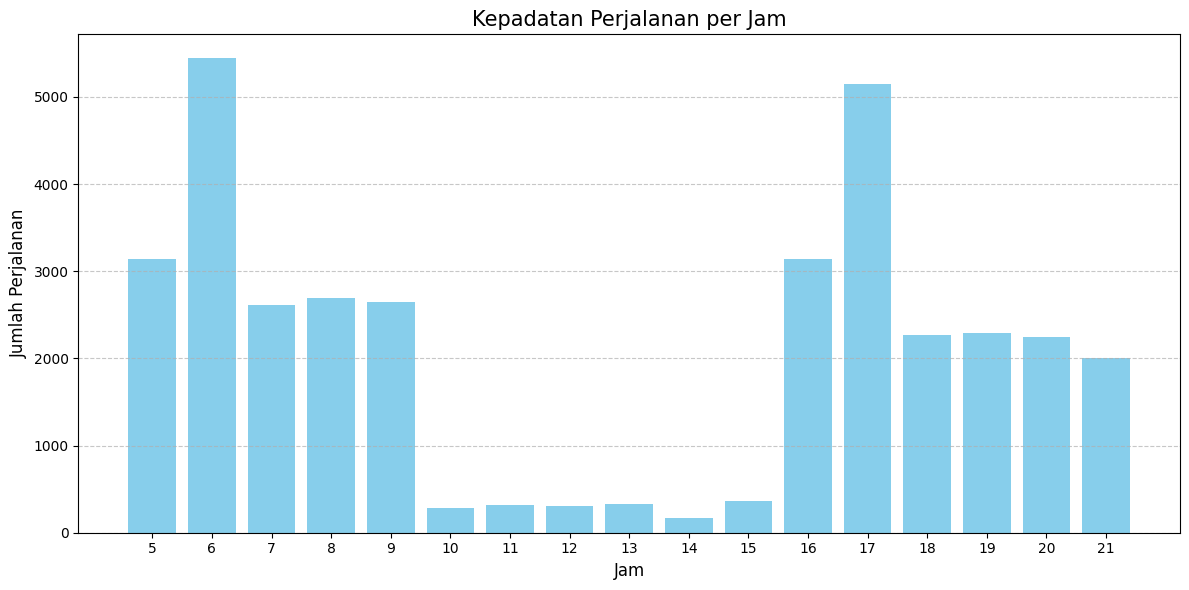

In [30]:
import matplotlib.pyplot as plt

# Visualisasi kepadatan perjalanan per jam
plt.figure(figsize=(12, 6))

# Membuat plot
plt.bar(density_time.index, density_time.values, color='skyblue')

plt.title('Kepadatan Perjalanan per Jam', fontsize=15)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Jumlah Perjalanan', fontsize=12)
plt.xticks(list(range(5, 22)))  # Menampilkan semua jam pada sumbu x
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan visualisasi
plt.tight_layout()
plt.show()


Grafik batang di atas menunjukkan kepadatan perjalanan per jam selama sehari. Dari grafik ini, kita dapat dengan jelas melihat bahwa jam sibuk (dengan jumlah perjalanan terbanyak) terjadi antara pukul 06:00-06:59 dan 17:00-17:59. Ada penurunan signifikan dalam perjalanan di luar jam-jam ini.

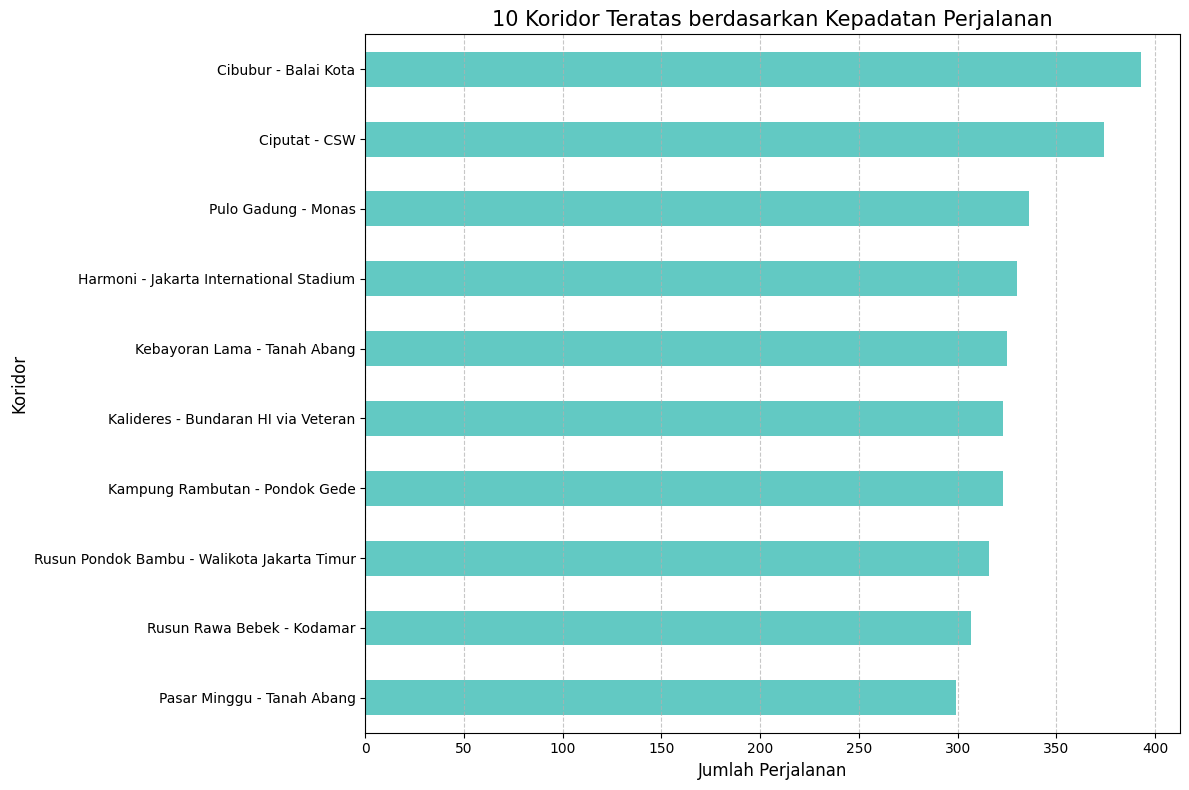

In [31]:
# Visualisasi 10 koridor teratas berdasarkan kepadatan
plt.figure(figsize=(12, 8))

# Membuat plot
top_corridors.head(10).plot(kind='barh', color='lightseagreen', alpha=0.7)

plt.title('10 Koridor Teratas berdasarkan Kepadatan Perjalanan', fontsize=15)
plt.xlabel('Jumlah Perjalanan', fontsize=12)
plt.ylabel('Koridor', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mengatur label y agar lebih mudah dibaca
plt.gca().invert_yaxis()

# Menampilkan visualisasi
plt.tight_layout()
plt.show()


Grafik di atas menunjukkan 10 koridor teratas berdasarkan kepadatan perjalanan. "Cibubur - Balai Kota" adalah koridor dengan lalu lintas penumpang terbanyak, diikuti oleh "Ciputat - CSW" dan beberapa lainnya. Informasi ini sangat berguna untuk pemangku kepentingan dalam merencanakan peningkatan layanan atau infrastruktur di koridor-koridor ini.

## Kesimpulan:

1. Pola Kepadatan Penumpang:
- Kepadatan penumpang mengalami peningkatan signifikan selama jam sibuk, terutama di pagi dan sore hari, yang sesuai dengan jam berangkat dan pulang kerja.
Terdapat fluktuasi kepadatan yang lebih rendah di luar jam sibuk, dengan penurunan tajam selama jam-jam malam.

2. Koridor dengan Kepadatan Tinggi:
- Beberapa koridor seperti "Cibubur - Balai Kota" dan "Ciputat - CSW" secara konsisten menunjukkan kepadatan tinggi, menandakan permintaan yang tinggi untuk layanan di rute ini.
Kepadatan tinggi ini mungkin mencerminkan kebutuhan infrastruktur yang lebih baik atau layanan tambahan di koridor tersebut.


## Rekomendasi:

1. Optimasi Layanan pada Jam Sibuk:
- Mengingat peningkatan kepadatan selama jam sibuk, disarankan untuk meningkatkan jumlah perjalanan atau kapasitas kendaraan selama periode tersebut.
- Penggunaan bus dengan kapasitas yang lebih besar atau peningkatan frekuensi layanan dapat membantu mengurangi kepadatan.

2. Pengembangan Infrastruktur di Koridor Padat:
- Untuk rute dengan kepadatan tinggi, investasi dalam pengembangan infrastruktur, seperti jalur khusus, perluasan halte, atau bahkan pengenalan moda transportasi alternatif mungkin diperlukan.
- Analisis lebih lanjut dapat dilakukan untuk menentukan penyebab kepadatan di koridor ini, apakah itu karena jumlah penumpang, frekuensi layanan, atau faktor lain.

3. Pemantauan dan Evaluasi Berkelanjutan:
- Disarankan untuk terus memantau pola perjalanan penumpang dan melakukan peninjauan berkala terhadap efektivitas layanan yang diberikan.
- Survei penumpang dan feedback dapat digunakan untuk memahami kebutuhan dan preferensi mereka, yang kemudian dapat menginformasikan peningkatan layanan.
- Dengan mengikuti rekomendasi ini, sistem transportasi dapat lebih baik dalam melayani penumpang dan mengatasi tantangan yang ditimbulkan oleh kepadatan penumpang yang tinggi.